                                  TASK 1: TOP 1000 YOUTUBE STREAMERS ANALYSIS

LIBRARIES

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1) Data Exploration

In [84]:
# Load your dataset (assuming it's already collected)
df = pd.read_csv(r'D:\New Folder\youtubers_df.csv')


In [85]:
# Check the structure of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB
None


In [86]:
#correcting the column name suscribers to subscribers
df.rename(columns={"Suscribers":"Subscribers"},inplace=True)
#checking the columns of dataframe
df.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [87]:
# Basic summary statistics
print(df.describe())

              Rank   Subscribers        Visits         Likes       Comments
count  1000.000000  1.000000e+03  1.000000e+03  1.000000e+03    1000.000000
mean    500.500000  2.189440e+07  1.209446e+06  5.363259e+04    1288.768000
std     288.819436  1.682775e+07  5.229942e+06  2.580457e+05    6778.188308
min       1.000000  1.170000e+07  0.000000e+00  0.000000e+00       0.000000
25%     250.750000  1.380000e+07  3.197500e+04  4.717500e+02       2.000000
50%     500.500000  1.675000e+07  1.744500e+05  3.500000e+03      67.000000
75%     750.250000  2.370000e+07  8.654750e+05  2.865000e+04     472.000000
max    1000.000000  2.495000e+08  1.174000e+08  5.300000e+06  154000.000000


In [88]:
# Check for missing values
print(df.isnull().sum())

Rank             0
Username         0
Categories     306
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64


In [89]:
# Explore the first few rows
print(df.head(5))

   Rank       Username           Categories  Subscribers         Country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia                  NaN  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        Visits      Likes  Comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtube.com/channel/UCk

In [90]:
# print data of first 10 rows 
print("Rows of first 10 rows of the Dataset:")
df.head(10)

Rows of first 10 rows of the Dataset:


,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


2) Trend Analysis

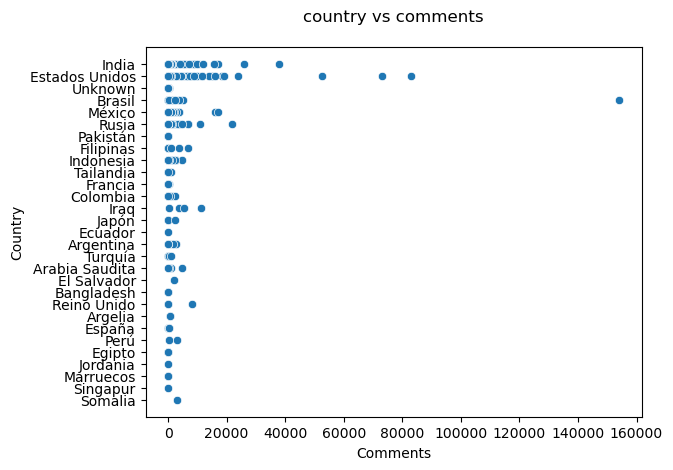

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trend: How do views correlate with subscribers?
sns.scatterplot(x='Comments', y='Country', data=df)
plt.title('country vs comments\n')
plt.show()


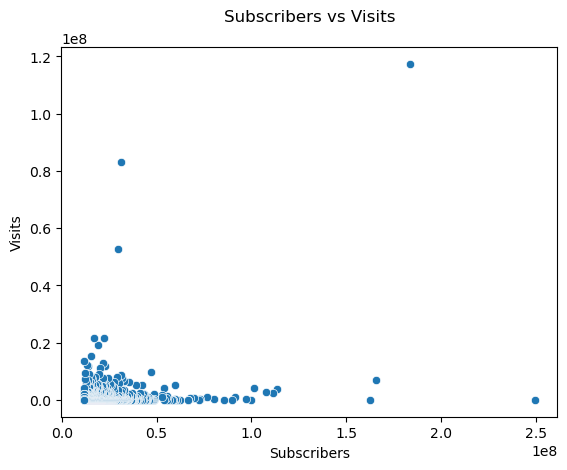

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trend: How do views correlate with subscribers?
sns.scatterplot(x='Subscribers', y='Visits', data=df)
plt.title('Subscribers vs Visits\n')
plt.show()

3)Audience Study 

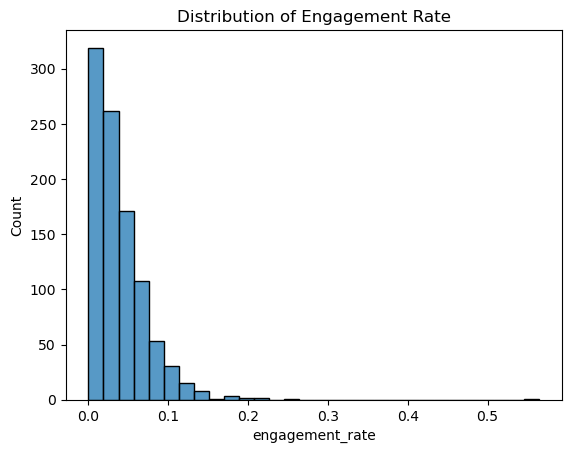

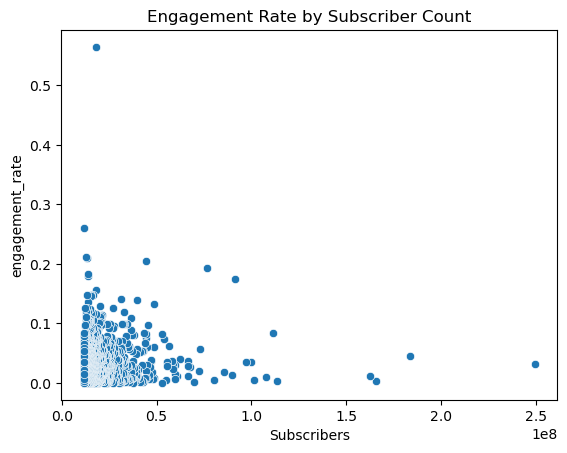

In [95]:
# Create a new feature: engagement rate (if engagement data is available)
df['engagement_rate'] = (df['Likes'] + df['Comments']) / df['Visits']

# Plot engagement rate across different channels
sns.histplot(df['engagement_rate'], bins=30)
plt.title('Distribution of Engagement Rate')
plt.show()

# Compare engagement rates with subscribers
sns.scatterplot(x='Subscribers', y='engagement_rate', data=df)
plt.title('Engagement Rate by Subscriber Count')
plt.show()


4)Content Category

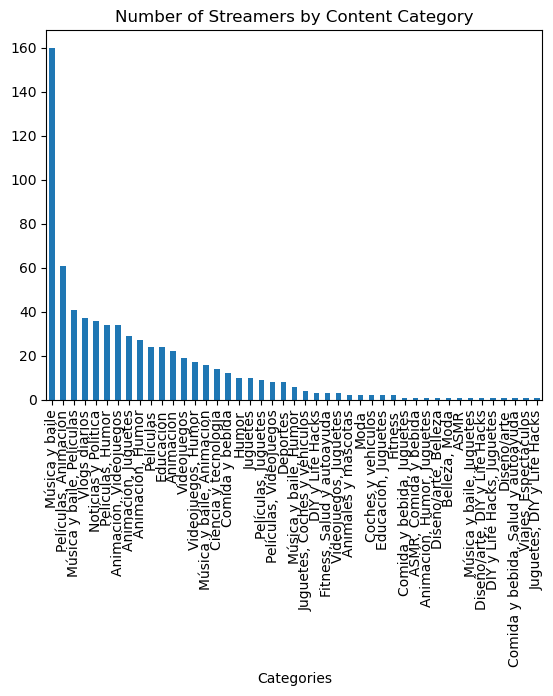

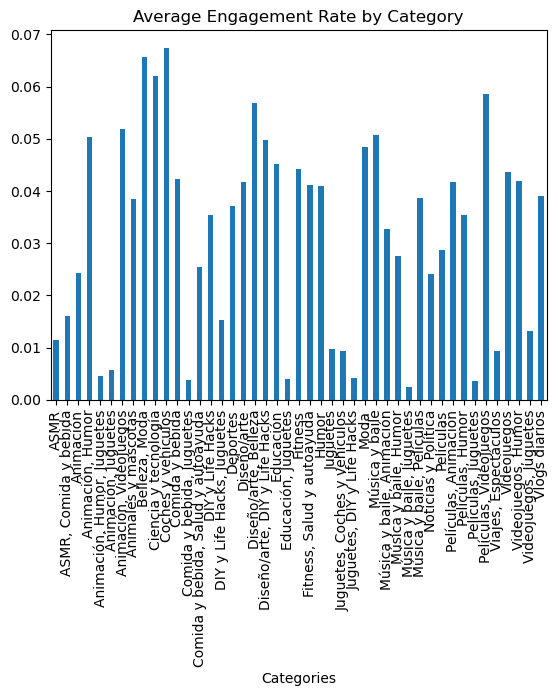

In [97]:
# Count number of streamers in each category
df['Categories'].value_counts().plot(kind='bar')
plt.title('Number of Streamers by Content Category')
plt.xticks(rotation=90)
plt.show()

# Average engagement rate by category
df.groupby('Categories')['engagement_rate'].mean().plot(kind='bar')
plt.title('Average Engagement Rate by Category')
plt.xticks(rotation=90)
plt.show()


5)Top Performers Identification

In [99]:
# Top 10 channels by number of subscribers
top_subscribers = df.nlargest(10, 'Subscribers')
print(top_subscribers[['Username', 'Subscribers']])

# Top 10 channels by views
top_views = df.nlargest(10, 'Visits')
print(top_views[['Username', 'Visits']])

# Top 10 channels by engagement rate
top_engagement = df.nlargest(10, 'engagement_rate')
print(top_engagement[['Username', 'engagement_rate']])


             Username  Subscribers
0             tseries  249500000.0
1             MrBeast  183500000.0
2           CoComelon  165500000.0
3            SETIndia  162600000.0
4       KidsDianaShow  113500000.0
5           PewDiePie  111500000.0
6  LikeNastyaofficial  107500000.0
7         VladandNiki  101400000.0
8     zeemusiccompany   99700000.0
9                 WWE   97200000.0
                  Username       Visits
1                  MrBeast  117400000.0
136               MrBeast2   83100000.0
153              DaFuqBoom   52700000.0
288  VillageCookingChannel   21500000.0
488      BeastPhilanthropy   21500000.0
390            jaanvipatel   19100000.0
586               _vector_   15400000.0
958                dojacat   13600000.0
300           alfredolarin   12900000.0
805                NickPro   12200000.0
               Username  engagement_rate
436  BispoBrunoLeonardo         0.564755
962           CNCOMusic         0.259881
850            piuzinho         0.211535
800     pra

6)Growth Potential Analysis

                Username       Visits  engagement_rate  \
0                tseries      86200.0         0.032227   
1                MrBeast  117400000.0         0.045302   
2              CoComelon    7000000.0         0.003529   
3               SETIndia      15600.0         0.011218   
4          KidsDianaShow    3900000.0         0.003179   
..                   ...          ...              ...   
95                 Ozuna      22700.0         0.109075   
96        TotalGaming093    1500000.0         0.089533   
97   GenevievesPlayhouse     965500.0         0.000853   
98  TechnoGamerzOfficial    6200000.0         0.057790   
99            RyansWorld     326500.0         0.006126   

                Categories  growth_score  
0           Música y baile           NaN  
1       Videojuegos, Humor           NaN  
2                Educación           NaN  
3                      NaN           NaN  
4      Animación, Juguetes           NaN  
..                     ...           ...  
95

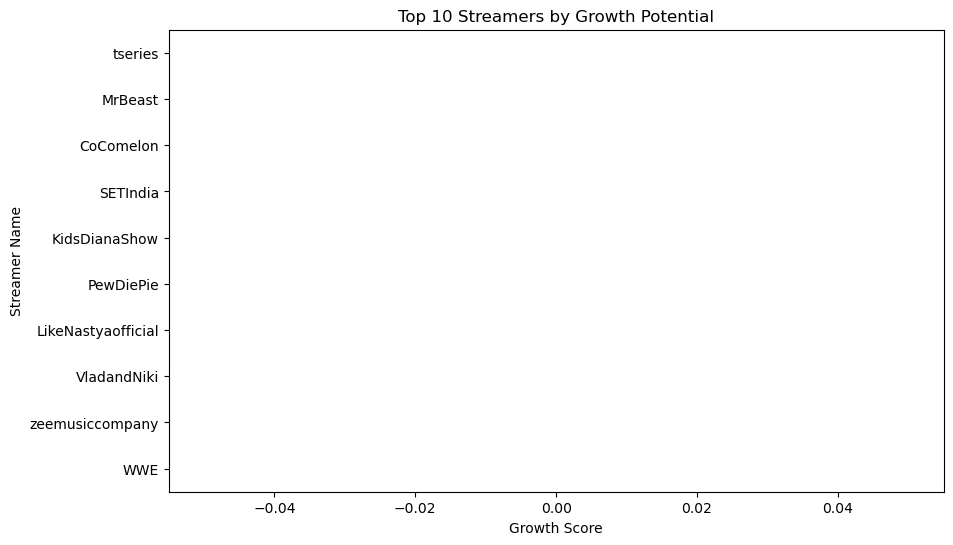

In [101]:

# Sample content weights (you can adjust these based on your analysis)
content_weights = {
    'gaming': 1.0,
    'lifestyle': 0.8,
    'education': 0.6,
    'tech': 0.7,
    'vlogs': 0.5
}

# Calculate engagement rate (likes + comments) per view
df['engagement_rate'] = (df['Likes'] + df['Comments']) / df['Visits']

# Normalize the engagement rate and views_per_video by scaling them between 0 and 1
df['norm_views_per_video'] = (df['Visits'] - df['Visits'].min()) / (df['Visits'].max() - df['Visits'].min())
df['norm_engagement_rate'] = (df['engagement_rate'] - df['engagement_rate'].min()) / (df['engagement_rate'].max() - df['engagement_rate'].min())

# Map categories to numeric values based on growth potential
df['category_score'] = df['Categories'].map(content_weights)

# Normalize content type scores
df['norm_content_type'] = (df['category_score'] - df['category_score'].min()) / (df['category_score'].max() - df['category_score'].min())

# Combine the normalized metrics into a final growth score
df['growth_score'] = (df['norm_views_per_video'] * 0.4) + (df['norm_engagement_rate'] * 0.4) + (df['norm_content_type'] * 0.2)

# Get the top 100 streamers by growth potential
top_100_streamers = df.nlargest(100, 'growth_score')

# Output the top 100 growth potential streamers
print(top_100_streamers[['Username', 'Visits', 'engagement_rate', 'Categories', 'growth_score']])

# Plot a bar chart of the top 10 streamers by growth score
top_10_streamers = top_100_streamers.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='growth_score', y='Username', data=top_10_streamers, hue='Username', palette='viridis', dodge=False)
plt.title('Top 10 Streamers by Growth Potential')
plt.xlabel('Growth Score')
plt.ylabel('Streamer Name')
plt.legend([], [], frameon=False)  # Removes the legend for hue
plt.show()


7)Video Content Performance 

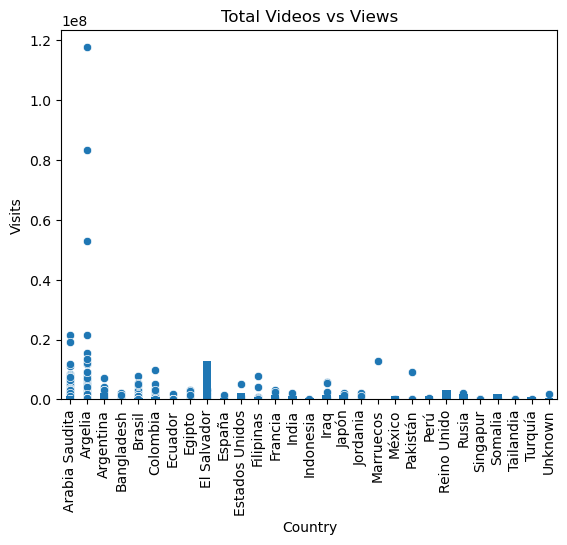

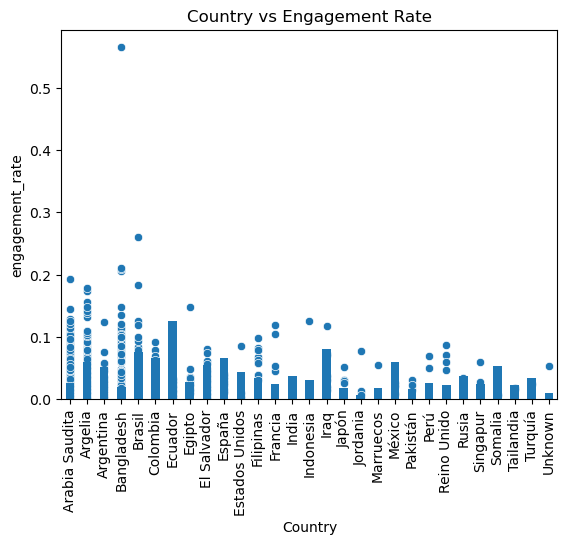

In [103]:
# Correlation between number of Countris and views
sns.scatterplot(x='Country', y='Visits', data=df)
df.groupby('Country')['Visits'].mean().plot(kind='bar')
plt.title('Total Videos vs Views')
plt.show()

# Correlation between number of Countries and engagement rate
sns.scatterplot(x='Country', y='engagement_rate', data=df)
df.groupby('Country')['engagement_rate'].mean().plot(kind='bar')
plt.title('Country vs Engagement Rate')
plt.show()


8) Correlation Analysis

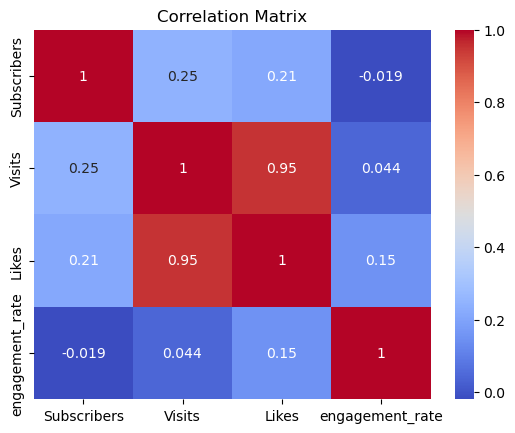

In [105]:
# Correlation matrix
corr_matrix = df[['Subscribers', 'Visits', 'Likes', 'engagement_rate']].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
